<a href="https://colab.research.google.com/github/Joseph-Willem-Ricci/5450-final-project/blob/joe/CIS5450_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIT 5450 Final Project
Joanne Crean, Juan Goleniowski, Joseph Ricci

# Setup

Before running, be sure to create a new Kaggle API token and save it as 'kaggle.json' in your default Google Drive location (/content/drive/MyDrive/)

In [2]:
# Installs
!pip install -q kaggle
!pip install pandasql
!pip install sqlalchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=fd751540fdacfc08bf89c63a0808aac5333b547253c481368c27c9cd3838caf9
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9


In [3]:
# Imports
import pandas as pd
import pandasql as ps
from google.colab import drive
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Setup
drive.mount('/content/drive')
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

Mounted at /content/drive


In [5]:
# Download Datasets
# Spotify Top 200 and Viral 50 Charts for 2017 through 2021 Dataset
!!kaggle datasets download -d dhruvildave/spotify-charts

# Spotify Audio Features Datasets
!!kaggle datasets download -d rodolfofigueroa/spotify-12m-songs
!!kaggle datasets download -d muhmores/spotify-top-100-songs-of-20152019
!!kaggle datasets download -d sashankpillai/spotify-top-200-charts-20202021
!!kaggle datasets download -d maharshipandya/-spotify-tracks-dataset
!!kaggle datasets download -d vatsalmavani/spotify-dataset
!!kaggle datasets download -d nandhakumarss/spotify-song-tracks
!!kaggle datasets download -d elemento/music-albums-popularity-prediction

# TikTok Popular Songs Dataset
!!kaggle datasets download -d sveta151/tiktok-popular-songs-2019
!!kaggle datasets download -d sveta151/tiktok-popular-songs-2020
!!kaggle datasets download -d sveta151/tiktok-popular-songs-2021

['Downloading tiktok-popular-songs-2021.zip to /content',
 '',
 '  0% 0.00/11.0k [00:00<?, ?B/s]',
 '',
 '100% 11.0k/11.0k [00:00<00:00, 8.31MB/s]']

In [6]:
# Unzip Datasets
!unzip /content/spotify-charts.zip
!unzip /content/spotify-12m-songs.zip
!unzip /content/spotify-top-100-songs-of-20152019.zip
!unzip /content/spotify-top-200-charts-20202021.zip
!unzip /content/-spotify-tracks-dataset.zip
!unzip /content/spotify-dataset.zip
!unzip /content/spotify-song-tracks.zip
!unzip /content/music-albums-popularity-prediction.zip
!unzip /content/tiktok-popular-songs-2019
!unzip /content/tiktok-popular-songs-2020
!unzip /content/tiktok-popular-songs-2021

Archive:  /content/spotify-charts.zip
  inflating: charts.csv              
Archive:  /content/spotify-12m-songs.zip
  inflating: tracks_features.csv     
Archive:  /content/spotify-top-100-songs-of-20152019.zip
  inflating: Spotify 2010 - 2019 Top 100 Songs.xlsx  
  inflating: Spotify 2010 - 2019 Top 100.csv  
Archive:  /content/spotify-top-200-charts-20202021.zip
  inflating: spotify_dataset.csv     
Archive:  /content/-spotify-tracks-dataset.zip
  inflating: dataset.csv             
Archive:  /content/spotify-dataset.zip
  inflating: data/data.csv           
  inflating: data/data_by_artist.csv  
  inflating: data/data_by_genres.csv  
  inflating: data/data_by_year.csv   
  inflating: data/data_w_genres.csv  
Archive:  /content/spotify-song-tracks.zip
  inflating: SpotifyFeatures.csv     
Archive:  /content/music-albums-popularity-prediction.zip
  inflating: sample_solution.csv     
  inflating: test.csv                
  inflating: train.csv               
Archive:  /content/tiktok

In [7]:
# Clean up directory to save space
!rm sample_data/*
!rm -d sample_data
!rm ./*.zip
!rm sample_solution.csv
!rm ./*.xlsx

rm: cannot remove 'sample_data/*': No such file or directory
rm: cannot remove 'sample_data': No such file or directory


In [8]:
# Read the csv files and save them to pandas dataframes
df_charts = pd.read_csv('charts.csv')
df_song_features_1 = pd.read_csv('tracks_features.csv')
df_song_features_2 = pd.read_csv('Spotify 2010 - 2019 Top 100.csv')
df_song_features_3 = pd.read_csv('spotify_dataset.csv')
df_song_features_4 = pd.read_csv('dataset.csv')
df_song_features_5 = pd.read_csv('data/data.csv')
df_song_features_6 = pd.read_csv('SpotifyFeatures.csv')
df_song_features_7 = pd.read_csv('train.csv')  # contains three songs per row, expands to 8 and 9 below
df_song_features_10 = pd.read_csv('test.csv')  # contains three songs per row, expands to 11 and 12 below
df_tiktok_19 = pd.read_csv('TikTok_songs_2019.csv')
df_tiktok_20 = pd.read_csv('TikTok_songs_2020.csv')
df_tiktok_21 = pd.read_csv('TikTok_songs_2021.csv')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Clean up remaining files
!rm data/*
!rm -d data
!rm ./*.csv

# Spotify Top 200 and Viral 50 Charts EDA

In [11]:
# Create a separate column for Year
df_charts['Year']=df_charts['date'].str.slice(stop=4)

# Cast 'Year' as Int
df_charts['Year'] = df_charts['Year'].astype(int)

# Show datatypes 
df_charts.dtypes

#remove ID, trend and streams columns
df_charts.drop(['url', 'trend', 'streams'], axis=1, inplace=True)

df_charts.dropna(inplace=True)

In [12]:
# Number of record per year
df_charts.groupby(by='Year').count()

,title,rank,date,artist,region,chart
Year,,,,,,
2017,4401145,4401145,4401145,4401145,4401145,4401145
2018,4863016,4863016,4863016,4863016,4863016,4863016
2019,5412658,5412658,5412658,5412658,5412658,5412658
2020,5793130,5793130,5793130,5793130,5793130,5793130
2021,5703536,5703536,5703536,5703536,5703536,5703536


In [13]:
# Songs and their highest ranking by year  # FIXME: *THE HIGHEST RANKING SONG FOR EACH ARTIST IN EACH YEAR*
#max_ranking_df = df_charts[df_charts['Year']<2019].groupby('artist', as_index=False).min('rank')
max_ranking_df = df_charts.groupby(['artist', 'Year'], as_index=False).min('rank')

In [14]:
max_ranking_df

,artist,Year,rank
0,!!!,2017,11
1,"!!!, Lea Lea",2017,12
2,"""Elena Of Avalor"" Cast",2018,46
3,"""Weird Al"" Yankovic",2018,1
4,"""聲夢傳奇""學員",2021,12
...,...,...,...
137737,이시강,2020,29
137738,이아람,2021,146
137739,지선,2020,44
137740,하숙자,2018,16


In [15]:
# query = """SELECT artist, count(date) as 'days as number 1'
# FROM df_charts
# WHERE rank == 1
# GROUP BY artist
# ORDER BY count(date) DESC
# LIMIT 50
# """

# sql_top_50_artists = ps.sqldf(query, locals())

In [16]:
# sql_top_50_artists

In [17]:
# query = """SELECT title, count(date) as 'days as number 1'
# FROM df_charts
# WHERE rank == 1
# GROUP BY title
# ORDER BY count(date) DESC
# LIMIT 50
# """

# sql_top_50_songs = ps.sqldf(query, locals())

In [18]:
# sql_top_50_songs

# Spotify Audio Feature Dataset Wrangling and EDA

Since the Spotify Top 200 and Viral 50 charts dataset does not come with audio features the songs, there is no guarantee that we can find datasets that include audio features for all of the songs in the charts. One relevant question to explore is therefore

1. Can we find audio feature data for a suitably "big" fraction of the songs in the Charts dataset?

Additionally, since we'll be combining multiple audio features datasets, there is no guarantee that those datasets share the same features, so

2. What fields do the datasets share?

In [19]:
# First, since we want to find song features for as many of the songs in 'df_charts' as possible, let's start by
# projecting df_charts by song title and artist name, which will uniquely identify each song, and then dropping duplicates
df_charts_songs_artists = df_charts[['title', 'artist']].drop_duplicates()

# Next, let's join the features datasets on song title and artist name and see what percentage of songs in charts_df
# each song features dataset can provide features for

# Clean extranneous characters from artist columns if necessary
df_song_features_1['artists'] = df_song_features_1['artists'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
df_song_features_5['artists'] = df_song_features_5['artists'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
df_song_features_7['artists'] = df_song_features_7['artists'].str.replace(', ', '')
df_song_features_10['artists'] = df_song_features_10['artists'].str.replace(', ', '')

In [20]:
# Rename song title "title" and "artist" columns in each dataframe and 
# create separate dataframes for features_7 and features_10, which each have three columns for each field for three different songs
df_song_features_1 = df_song_features_1.rename(columns={'name': 'title', 'artists': 'artist'})
# _song_features_2 already has fields 'title' and 'artist'
df_song_features_3 = df_song_features_3.rename(columns={'Song Name': 'title', 'Artist': 'artist'})
df_song_features_4 = df_song_features_4.rename(columns={'track_name': 'title', 'artists': 'artist'})
df_song_features_5 = df_song_features_5.rename(columns={'name': 'title', 'artists': 'artist'})
df_song_features_6 = df_song_features_6.rename(columns={'track_name': 'title', 'artist_name': 'artist'})
df_song_features_8 = df_song_features_7.rename(columns={'t_name1': 'title', 'artists': 'artist'}).drop(columns=['t_name0', 't_name2', 't_dur0', 't_dur2', 't_dance0', 't_dance2', 't_energy0', 't_energy2', 't_key0', 't_key2', 't_mode0', 't_mode2', 't_speech0', 't_speech2', 't_acous0', 't_acous2', 't_ins0', 't_ins2', 't_live0', 't_live2', 't_val0', 't_val2', 't_tempo0', 't_tempo2', 't_sig0', 't_sig2'])
df_song_features_9 = df_song_features_7.rename(columns={'t_name2': 'title', 'artists': 'artist'}).drop(columns=['t_name0', 't_name1', 't_dur0', 't_dur1', 't_dance0', 't_dance1', 't_energy0', 't_energy1', 't_key0', 't_key1', 't_mode0', 't_mode1', 't_speech0', 't_speech1', 't_acous0', 't_acous1', 't_ins0', 't_ins1', 't_live0', 't_live1', 't_val0', 't_val1', 't_tempo0', 't_tempo1', 't_sig0', 't_sig1'])
df_song_features_7 = df_song_features_7.rename(columns={'t_name0': 'title', 'artists': 'artist'}).drop(columns=['t_name1', 't_name2', 't_dur1', 't_dur2', 't_dance1', 't_dance2', 't_energy1', 't_energy2', 't_key1', 't_key2', 't_mode1', 't_mode2', 't_speech1', 't_speech2', 't_acous1', 't_acous2', 't_ins1', 't_ins2', 't_live1', 't_live2', 't_val1', 't_val2', 't_tempo1', 't_tempo2', 't_sig1', 't_sig2'])
df_song_features_11 = df_song_features_10.rename(columns={'t_name1': 'title', 'artists': 'artist'}).drop(columns=['t_name0', 't_name2', 't_dur0', 't_dur2', 't_dance0', 't_dance2', 't_energy0', 't_energy2', 't_key0', 't_key2', 't_mode0', 't_mode2', 't_speech0', 't_speech2', 't_acous0', 't_acous2', 't_ins0', 't_ins2', 't_live0', 't_live2', 't_val0', 't_val2', 't_tempo0', 't_tempo2', 't_sig0', 't_sig2'])
df_song_features_12 = df_song_features_10.rename(columns={'t_name2': 'title', 'artists': 'artist'}).drop(columns=['t_name0', 't_name1', 't_dur0', 't_dur1', 't_dance0', 't_dance1', 't_energy0', 't_energy1', 't_key0', 't_key1', 't_mode0', 't_mode1', 't_speech0', 't_speech1', 't_acous0', 't_acous1', 't_ins0', 't_ins1', 't_live0', 't_live1', 't_val0', 't_val1', 't_tempo0', 't_tempo1', 't_sig0', 't_sig1'])
df_song_features_10 = df_song_features_10.rename(columns={'t_name0': 'title', 'artists': 'artist'}).drop(columns=['t_name1', 't_name2', 't_dur1', 't_dur2', 't_dance1', 't_dance2', 't_energy1', 't_energy2', 't_key1', 't_key2', 't_mode1', 't_mode2', 't_speech1', 't_speech2', 't_acous1', 't_acous2', 't_ins1', 't_ins2', 't_live1', 't_live2', 't_val1', 't_val2', 't_tempo1', 't_tempo2', 't_sig1', 't_sig2'])

# Project only the necessary columns from each feature dataset and also rename to maintain consistency
features_1_projected = df_song_features_1[['title', 'artist']]
features_2_projected = df_song_features_2[['title', 'artist']]
features_3_projected = df_song_features_3[['title', 'artist']]
features_4_projected = df_song_features_4[['title', 'artist']]
features_5_projected = df_song_features_5[['title', 'artist']]
features_6_projected = df_song_features_6[['title', 'artist']]
features_7_projected = df_song_features_7[['title', 'artist']]
features_8_projected = df_song_features_8[['title', 'artist']]
features_9_projected = df_song_features_9[['title', 'artist']]
features_10_projected = df_song_features_10[['title', 'artist']]
features_11_projected = df_song_features_11[['title', 'artist']]
features_12_projected = df_song_features_12[['title', 'artist']]
all_songs_with_features = pd.concat([features_1_projected, features_2_projected, features_3_projected, features_4_projected, 
                                     features_5_projected, features_6_projected, features_7_projected, features_8_projected, 
                                     features_9_projected, features_10_projected, features_11_projected, features_12_projected], ignore_index=True).drop_duplicates()

# Join on song title and artist name
feature_matches = pd.merge(df_charts_songs_artists, all_songs_with_features, on=['title', 'artist'], how='inner')

# Calculate the percentage of songs each features dataset was able to provide song features for
match_percentage_combined = 100 * feature_matches.shape[0] / df_charts_songs_artists.shape[0]
print("We are able to provide audio features for " + str(round(match_percentage_combined,2)) + "% of songs in df_charts,"\
      " for a total of " + str(feature_matches.shape[0]) + " out of " + str(df_charts_songs_artists.shape[0]) + " songs")

We are able to provide audio features for 17.58% of songs in df_charts, for a total of 34720 out of 197533 songs


Lets now see whether we can do any additional cleaning to boost our match percentage. Since there are many obscure songs in df_charts that have, say, reached chart position 200 in small countries like Latvia and Ecuador, let us limit our search to songs that charted highly in the United States, and see if any of those songs were unmatched in the features data

In [21]:
non_matches = pd.merge(df_charts[df_charts['rank'] > 10][df_charts['region'] == 'United States'][['title', 'artist']], 
                                  all_songs_with_features, on=['title', 'artist'], how='left', indicator=True).drop_duplicates()
non_matches = non_matches[non_matches['_merge'] == 'left_only']
non_matches.head()

<ipython-input-21-b56ed4472038>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_matches = pd.merge(df_charts[df_charts['rank'] > 10][df_charts['region'] == 'United States'][['title', 'artist']],


,title,artist,_merge
3,X (feat. Future),"21 Savage, Metro Boomin",left_only
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,"ZAYN, Taylor Swift",left_only
5,Don't Wanna Know,"Maroon 5, Kendrick Lamar",left_only
17,Sneakin’,"Drake, 21 Savage",left_only
32,Cold Water (feat. Justin Bieber & MØ),Major Lazer,left_only


In [22]:
# Does all_songs_with_features contain any of these songs but perhaps with a different format for title and artist?
print(all_songs_with_features[all_songs_with_features['artist'] == 'NLE Choppa, Roddy Ricch'])

                                   title                   artist
991025  Walk Em Down (feat. Roddy Ricch)  NLE Choppa, Roddy Ricch


This suggests that when there is a featured artist, the ordering of the artist names in the features datasets may be the opposite of the ordering in the charts dataset. Lets look at the other row with a featured artist.

In [23]:
print(all_songs_with_features[all_songs_with_features['artist'] == "Khalid, Summer Walker"])

                                title                 artist
1111433  Eleven (feat. Summer Walker)  Khalid, Summer Walker


In this case, the featured artist is not included in the 'artist' column in the charts dataset, but is in the features datasets. In joins so far, we have been joining on 'artist' and 'title' to be sure to uniquely identify each song. But since these songs with featured artists have varying formats in the 'artist' column, but the same format in the 'title' column, and since they are sure to be uniquely identified just by song title, let us try to filter by songs that have "(feat. " in their title, and join the charts and features datasets on 'title'.

In [24]:
charts_featured = df_charts_songs_artists[df_charts_songs_artists['title'].str.contains("\(feat\. ")][['title', 'artist']]
featured_feature_matches = pd.merge(charts_featured, all_songs_with_features, on=['title'], how='inner').drop_duplicates(subset='title')
featured_feature_matches = featured_feature_matches.rename(columns={'artist_x': 'artist'})
feature_matches = pd.concat([feature_matches, featured_feature_matches], ignore_index=True).drop_duplicates(subset = ['title', 'artist'])
match_percentage_combined = 100 * feature_matches.shape[0] / df_charts_songs_artists.shape[0]
print("We are able to provide audio features for " + str(round(match_percentage_combined,2)) + "% of songs in df_charts,"\
      " for a total of " + str(feature_matches.shape[0]) + " out of " + str(df_charts_songs_artists.shape[0]) + " songs")

We are able to provide audio features for 18.44% of songs in df_charts, for a total of 36433 out of 197533 songs


In [25]:
feature_matches.head()

,title,artist,artist_y
0,Chantaje (feat. Maluma),Shakira,NaN
1,Reggaetón Lento (Bailemos),CNCO,NaN
2,Safari,"J Balvin, Pharrell Williams, BIA, Sky",NaN
3,Shaky Shaky,Daddy Yankee,NaN
4,Traicionera,Sebastian Yatra,NaN


There is one more case that might result in two rows for the same song in different dataframes not to match. We can see that the song title is always the same for the same song between datasets, but we get into trouble when multiple artists are on the same song. This need not be when there is a "featured artist". So let us match on song title and when `all_songs_with_features['artist']` contains one artist that is contained as a substring in the artists in df_charts

In [26]:
# match df_charts and all_songs_with_features only on the title to start with. There will be many incorrect matches when two artists have songs by the same name
feature_charts_substr_match = pd.merge(df_charts_songs_artists, all_songs_with_features, on=['title'], how='inner')
feature_charts_substr_match['actual_match'] = feature_charts_substr_match[['artist_x', 'artist_y']].apply(lambda x: x['artist_y'].split(',')[0] in x['artist_x'] and x['artist_y'] != x['artist_x'], axis=1)
feature_charts_substr_match = feature_charts_substr_match[feature_charts_substr_match['actual_match'] == True].rename(columns={'artist_x': 'artist'})
feature_charts_substr_match.head()

,title,artist,artist_y,actual_match
0,Chantaje (feat. Maluma),Shakira,"Shakira, Maluma",True
3,Vente Pa' Ca (feat. Maluma),Ricky Martin,"Ricky Martin, Maluma",True
13,Safari,"J Balvin, Pharrell Williams, BIA, Sky",J Balvin,True
154,Otra vez (feat. J Balvin),Zion & Lennox,"Zion & Lennox, J Balvin",True
156,La Bicicleta,"Carlos Vives, Shakira",Carlos Vives,True


We can see here many songs that aren't necessarily "featured artist" songs, that have different formats in the artist column.

In [27]:
feature_charts_substr_match = feature_charts_substr_match.drop_duplicates(subset=['title', 'artist'])
feature_matches = pd.concat([feature_matches, feature_charts_substr_match], ignore_index=True).drop_duplicates()
feature_matches.drop(columns=['actual_match'], inplace=True)
match_percentage_combined = 100 * feature_matches.shape[0] / df_charts_songs_artists.shape[0]
print("We are able to provide audio features for " + str(round(match_percentage_combined,2)) + "% of songs in df_charts,"\
      " for a total of " + str(feature_matches.shape[0]) + " out of " + str(df_charts_songs_artists.shape[0]) + " songs")

We are able to provide audio features for 22.11% of songs in df_charts, for a total of 43673 out of 197533 songs


In [28]:
feature_matches.head()

,title,artist,artist_y
0,Chantaje (feat. Maluma),Shakira,NaN
1,Reggaetón Lento (Bailemos),CNCO,NaN
2,Safari,"J Balvin, Pharrell Williams, BIA, Sky",NaN
3,Shaky Shaky,Daddy Yankee,NaN
4,Traicionera,Sebastian Yatra,NaN


Next, lets see what columns each of the features datasets share, and create one unified features dataset.

In [29]:
print([col for col in df_song_features_1.columns])
print([col for col in df_song_features_2.columns])
print([col for col in df_song_features_3.columns])
print([col for col in df_song_features_4.columns])
print([col for col in df_song_features_5.columns])
print([col for col in df_song_features_6.columns])
print([col for col in df_song_features_7.columns])
print([col for col in df_song_features_8.columns])
print([col for col in df_song_features_9.columns])
print([col for col in df_song_features_10.columns])
print([col for col in df_song_features_11.columns])
print([col for col in df_song_features_12.columns])

['id', 'title', 'album', 'album_id', 'artist', 'artist_ids', 'track_number', 'disc_number', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'year', 'release_date']
['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year', 'artist type']
['Index', 'Highest Charting Position', 'Number of Times Charted', 'Week of Highest Charting', 'title', 'Streams', 'artist', 'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Chord']
['Unnamed: 0', 'track_id', 'artist', 'album_name', 'title', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',

Common columns:

title, artist, tempo, energy, danceability, liveness, valence, duration, acousticness, speechiness

In [30]:
features_1_drop_cols = ['loudness', 'album', 'id', 'album_id', 'artist_ids', 'track_number', 'disc_number', 'explicit', 'key', 'mode', 'instrumentalness', 'time_signature', 'year', 'release_date']
features_2_drop_cols = ['dB', 'year released', 'added', 'pop', 'top year', 'artist type', 'top genre']
features_3_drop_cols = ['Chord', 'Loudness', 'Index', 'Highest Charting Position', 'Number of Times Charted', 'Week of Highest Charting', 'Streams', 'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted', 'Popularity']
features_4_drop_cols = ['loudness', 'Unnamed: 0', 'track_id', 'album_name', 'popularity', 'explicit', 'key', 'mode', 'instrumentalness', 'time_signature', 'track_genre']
features_5_drop_cols = ['loudness', 'year', 'explicit', 'id', 'instrumentalness', 'key', 'mode', 'popularity', 'release_date']
features_6_drop_cols = ['loudness', 'genre', 'track_id', 'popularity', 'instrumentalness', 'key', 'mode', 'time_signature']
features_7_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key0', 't_mode0', 't_ins0', 't_sig0', 'popularity']
features_8_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key1', 't_mode1', 't_ins1', 't_sig1', 'popularity']
features_9_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key2', 't_mode2', 't_ins2', 't_sig2', 'popularity']
features_10_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key0', 't_mode0', 't_ins0', 't_sig0']
features_11_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key1', 't_mode1', 't_ins1', 't_sig1']
features_12_drop_cols = ['id', 'name', 'release_date', 'total_tracks', 't_key2', 't_mode2', 't_ins2', 't_sig2']

features_2_rename_map = {'bpm': 'tempo', 'nrgy': 'energy', 'dnce': 'danceability', 'live': 'liveness', 'val': 'valence', 'dur': 'duration_ms', 'acous': 'acousticness', 'spch': 'speechiness'}
features_3_rename_map = {'Danceability': 'danceability', 'Energy': 'energy', 'Speechiness': 'speechiness', 'Acousticness': 'acousticness', 'Liveness': 'liveness', 'Tempo': 'tempo', 'Duration (ms)': 'duration_ms', 'Valence': 'valence'}
features_7_rename_map = {'t_dance0': 'danceability', 't_energy0': 'energy', 't_speech0': 'speechiness', 't_acous0': 'acousticness', 't_live0': 'liveness', 't_tempo0': 'tempo', 't_dur0': 'duration_ms', 't_val0': 'valence'}
features_8_rename_map = {'t_dance1': 'danceability', 't_energy1': 'energy', 't_speech1': 'speechiness', 't_acous1': 'acousticness', 't_live1': 'liveness', 't_tempo1': 'tempo', 't_dur1': 'duration_ms', 't_val1': 'valence'}
features_9_rename_map = {'t_dance2': 'danceability', 't_energy2': 'energy', 't_speech2': 'speechiness', 't_acous2': 'acousticness', 't_live2': 'liveness', 't_tempo2': 'tempo', 't_dur2': 'duration_ms', 't_val2': 'valence'}
features_10_rename_map = {'t_dance0': 'danceability', 't_energy0': 'energy', 't_speech0': 'speechiness', 't_acous0': 'acousticness', 't_live0': 'liveness', 't_tempo0': 'tempo', 't_dur0': 'duration_ms', 't_val0': 'valence'}
features_11_rename_map = {'t_dance1': 'danceability', 't_energy1': 'energy', 't_speech1': 'speechiness', 't_acous1': 'acousticness', 't_live1': 'liveness', 't_tempo1': 'tempo', 't_dur1': 'duration_ms', 't_val1': 'valence'}
features_12_rename_map = {'t_dance2': 'danceability', 't_energy2': 'energy', 't_speech2': 'speechiness', 't_acous2': 'acousticness', 't_live2': 'liveness', 't_tempo2': 'tempo', 't_dur2': 'duration_ms', 't_val2': 'valence'}

df_song_features_1 = df_song_features_1.drop(columns=features_1_drop_cols)
df_song_features_2 = df_song_features_2.drop(columns=features_2_drop_cols).rename(columns=features_2_rename_map)
df_song_features_3 = df_song_features_3.drop(columns=features_3_drop_cols).rename(columns=features_3_rename_map)
df_song_features_4 = df_song_features_4.drop(columns=features_4_drop_cols)
df_song_features_5 = df_song_features_5.drop(columns=features_5_drop_cols)
df_song_features_6 = df_song_features_6.drop(columns=features_6_drop_cols)
df_song_features_7 = df_song_features_7.drop(columns=features_7_drop_cols).rename(columns=features_7_rename_map)
df_song_features_8 = df_song_features_8.drop(columns=features_8_drop_cols).rename(columns=features_8_rename_map)    
df_song_features_9 = df_song_features_9.drop(columns=features_9_drop_cols).rename(columns=features_9_rename_map)
df_song_features_10 = df_song_features_10.drop(columns=features_10_drop_cols).rename(columns=features_10_rename_map)
df_song_features_11 = df_song_features_11.drop(columns=features_11_drop_cols).rename(columns=features_11_rename_map)
df_song_features_12 = df_song_features_12.drop(columns=features_12_drop_cols).rename(columns=features_12_rename_map)

Check that all features dataframes have the same columns now:

In [31]:
print(([col for col in df_song_features_1.columns.sort_values()]))
print(([col for col in df_song_features_2.columns.sort_values()]))
print(([col for col in df_song_features_3.columns.sort_values()]))
print(([col for col in df_song_features_4.columns.sort_values()]))
print(([col for col in df_song_features_5.columns.sort_values()]))
print(([col for col in df_song_features_6.columns.sort_values()]))
print(([col for col in df_song_features_7.columns.sort_values()]))
print(([col for col in df_song_features_8.columns.sort_values()])) 
print(([col for col in df_song_features_9.columns.sort_values()]))
print(([col for col in df_song_features_10.columns.sort_values()]))
print(([col for col in df_song_features_11.columns.sort_values()]))
print(([col for col in df_song_features_12.columns.sort_values()]))

['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acousticness', 'artist', 'danceability', 'duration_ms', 'energy', 'liveness', 'speechiness', 'tempo', 'title', 'valence']
['acoust

Now lets concatenate all of these features dataframes into one and do an inner join with `feature_matches`, the songs with features that are in `df_charts` to get the final, combined features dataset

In [32]:
df_features = pd.concat([df_song_features_1, df_song_features_2, df_song_features_3, df_song_features_4, df_song_features_5, df_song_features_6, df_song_features_7, df_song_features_8, df_song_features_9, df_song_features_10, df_song_features_11, df_song_features_12], axis=0, ignore_index=True)
df_features = df_features.dropna()
df_features_artist_format_1 = pd.merge(df_features, feature_matches, left_on=['title', 'artist'], right_on=['title', 'artist_y'], how='inner', suffixes=("", "_x"))  # 'artist' in the format of df_charts
df_features_artist_format_2 = pd.merge(df_features, feature_matches, on=['title', 'artist'], how='inner')  # 'artist' in the format of features dfs

In [33]:
df_features_artist_format_1.drop_duplicates(subset=['title', 'artist_y'], inplace=True)
df_features_artist_format_1.drop(columns=['artist', 'artist_y'], inplace=True)
df_features_artist_format_1.rename(columns={'artist_x': 'artist'}, inplace=True)
df_features_artist_format_2.drop_duplicates(subset=['title', 'artist'], inplace=True)
df_features_artist_format_2.drop(columns=['artist_y'], inplace=True)

In [34]:
df_features_artist_format_1.head()

,title,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms,artist
0,Cry Baby (feat. DaBaby),0.955,0.436,0.38,0.00527,0.169,0.559,130.041,137984,Megan Thee Stallion
2,Do It On The Tip (feat. City Girls & Hot Girl ...,0.944,0.526,0.289,0.00281,0.0862,0.619,97.543,167370,Megan Thee Stallion
6,Movie (feat. Lil Durk),0.896,0.728,0.287,0.00245,0.128,0.877,152.062,227375,Megan Thee Stallion
10,Freaky Girls (feat. SZA),0.816,0.666,0.176,0.000707,0.156,0.25,93.952,166906,Megan Thee Stallion
14,Intercourse (feat. Popcaan & Mustard),0.8,0.596,0.239,0.0775,0.201,0.424,98.037,197023,Megan Thee Stallion


In [35]:
df_features_artist_format_2.head()

,title,artist,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,Guerrilla Radio,Rage Against The Machine,0.599,0.957,0.188,0.0129,0.155,0.489,103.68,206200
14,Sleep Now In the Fire,Rage Against The Machine,0.426,0.929,0.0701,0.00162,0.0789,0.539,127.059,205600
21,Killing In the Name,Rage Against The Machine,0.457,0.779,0.257,0.0185,0.0247,0.734,86.573,313667
24,Possession Obsession,Daryl Hall & John Oates,0.757,0.532,0.0283,0.119,0.1,0.896,114.822,275960
26,Swear It Again - Radio Edit,Westlife,0.626,0.532,0.0276,0.296,0.123,0.33,130.076,247933


In [36]:
df_features = pd.concat([df_features_artist_format_2, df_features_artist_format_1]).drop_duplicates(subset=['title', 'artist'])
df_features.reset_index(drop=True, inplace=True)
df_features.shape[0]

39638

In [37]:
df_features.head()

,title,artist,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,Guerrilla Radio,Rage Against The Machine,0.599,0.957,0.188,0.0129,0.155,0.489,103.68,206200
1,Sleep Now In the Fire,Rage Against The Machine,0.426,0.929,0.0701,0.00162,0.0789,0.539,127.059,205600
2,Killing In the Name,Rage Against The Machine,0.457,0.779,0.257,0.0185,0.0247,0.734,86.573,313667
3,Possession Obsession,Daryl Hall & John Oates,0.757,0.532,0.0283,0.119,0.1,0.896,114.822,275960
4,Swear It Again - Radio Edit,Westlife,0.626,0.532,0.0276,0.296,0.123,0.33,130.076,247933


Join with `df_charts` to get a unified dataframe with chart and feature columns

In [38]:
df_charts.head()

,title,rank,date,artist,region,chart,Year
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,top200,2017
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,top200,2017
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,top200,2017
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,2017
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,top200,2017


In [39]:
# df_charts_features is all unique songs that we have audio features for, and their highest rank in all territories in all years
df_charts_features = pd.merge(df_charts.drop(columns=['date', 'region', 'chart']).groupby(by=['title', 'artist'], as_index=False).min(), df_features, on=['title', 'artist'], how='inner')
print("We have been able to find audio features for " + str(df_charts_features.shape[0]) + " unique songs.")

We have been able to find audio features for 39638 unique songs.


In [40]:
df_charts_features.head(10)

,title,artist,rank,Year,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,!,O.S.T.R.,27,2018,0.561,0.798,0.32,0.307,0.11,0.14,140.837,221760
1,!!!,"nns, kkn, Ryu",5,2021,0.808,0.76,0.292,0.0107,0.207,0.774,82.203,148378
2,!I'll Be Back!,Rilès,14,2018,0.823,0.612,0.248,0.168,0.109,0.688,142.959,178533
3,"""42"" - From SR3MM","Rae Sremmurd, Swae Lee, Slim Jxmmi",130,2018,0.968,0.563,0.125,0.00275,0.108,0.324,130.039,238020
4,"""99""",Barns Courtney,15,2018,0.552,0.804,0.0303,0.00598,0.111,0.714,95.98,199413
5,"""All That Is or Ever Was or Ever Will Be""",Alan Silvestri,185,2017,0.292,0.139,0.0354,0.981,0.32,0.0338,73.37,95720
6,"""BOP""",CJ,199,2021,0.885,0.741,0.381,0.357,0.342,0.603,139.144,110375
7,"""Eungenio"" Salvador Dali",Mecano,49,2018,0.458,0.323,0.0503,0.86,0.117,0.0432,72.328,325120
8,"""Jag fakking hatar er""","ODZ, Young Earth Sauce",53,2018,0.786,0.822,0.238,0.2,0.181,0.601,130.144,145969.0
9,"""Was He Slow?"" - Music From The Motion Picture...",Kid Koala,1,2017,0.754,0.719,0.371,0.373,0.12,0.674,175.99,106880


In [41]:
df_top200 = df_charts[df_charts['chart'] == 'top200'].drop(columns=['date']).groupby(['title', 'artist', 'region', 'Year'], as_index=False).min().drop(columns=['chart']) # keep the highest rank for each song in each territory per year
df_viral50 = df_charts[df_charts['chart'] == 'viral50'].drop(columns=['date']).groupby(['title', 'artist', 'region', 'Year'], as_index=False).min().drop(columns=['chart'])

# df_top200_features and df_viral50_features contains a row for each song and its highest rank in each year and in each territory
df_top200_features = pd.merge(df_top200, df_features, on=['title', 'artist'], how='inner')
df_viral50_features = pd.merge(df_viral50, df_features, on=['title', 'artist'], how='inner')

In [42]:
df_top200_features.head(100)

,title,artist,region,Year,rank,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,!,O.S.T.R.,Poland,2018,58,0.561,0.798,0.32,0.307,0.11,0.14,140.837,221760
1,!I'll Be Back!,Rilès,France,2018,139,0.823,0.612,0.248,0.168,0.109,0.688,142.959,178533
2,"""42"" - From SR3MM","Rae Sremmurd, Swae Lee, Slim Jxmmi",United States,2018,130,0.968,0.563,0.125,0.00275,0.108,0.324,130.039,238020
3,"""All That Is or Ever Was or Ever Will Be""",Alan Silvestri,Poland,2017,185,0.292,0.139,0.0354,0.981,0.32,0.0338,73.37,95720
4,"""All That Is or Ever Was or Ever Will Be""",Alan Silvestri,Turkey,2017,198,0.292,0.139,0.0354,0.981,0.32,0.0338,73.37,95720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,'Till I Collapse,"Eminem, Nate Dogg",Czech Republic,2017,79,0.548,0.847,0.186,0.0622,0.0816,0.1,171.447,297787
96,'Till I Collapse,"Eminem, Nate Dogg",Czech Republic,2018,84,0.548,0.847,0.186,0.0622,0.0816,0.1,171.447,297787
97,'Till I Collapse,"Eminem, Nate Dogg",Czech Republic,2019,124,0.548,0.847,0.186,0.0622,0.0816,0.1,171.447,297787
98,'Till I Collapse,"Eminem, Nate Dogg",Czech Republic,2020,135,0.548,0.847,0.186,0.0622,0.0816,0.1,171.447,297787


# Constructing Artist Popularity Dataset

In [43]:
# Copy Artist and Year from main df_charts_features table, one record per artist/Year combination
df_trend_ranking = df_charts_features[['artist','Year']].drop_duplicates()

In [44]:
# Add Best Ranking Position in all regions
df_trend_ranking = df_trend_ranking.merge(max_ranking_df, left_on=['artist','Year'], right_on=['artist','Year'], how='left')
df_trend_ranking.rename(columns={'rank':'Best_Ranking_Position'}, inplace=True)


In [45]:
# Calculate number of days trending in the US and in Rest of the World
days_trending_us = df_charts[df_charts['region']=='United States'].groupby(['artist', 'Year'], as_index=False)[['date']].count()
days_trending_row = df_charts[df_charts['region']!='United States'].groupby(['artist', 'Year'], as_index=False)[['date']].count()

In [46]:
# Add days trending to df_trend_ranking
df_trend_ranking = df_trend_ranking.merge(days_trending_us, left_on=['artist','Year'], right_on=['artist','Year'], how="left")
df_trend_ranking.rename(columns={'date':'Days_Trending_US'}, inplace=True)
df_trend_ranking = df_trend_ranking.merge(days_trending_row, left_on=['artist','Year'], right_on=['artist','Year'], how="left")
df_trend_ranking.rename(columns={'date':'Days_Trending_ROW', 'Year_y':'Year'}, inplace=True)

In [47]:
# Replace NaN for 0
df_trend_ranking[['Days_Trending_US', 'Days_Trending_ROW']]=df_trend_ranking[['Days_Trending_US', 'Days_Trending_ROW']].fillna(0)


In [48]:
# Final table with artist, top position across all regions, and days trending in the US and ROW - change for git
df_trend_ranking

,artist,Year,Best_Ranking_Position,Days_Trending_US,Days_Trending_ROW
0,O.S.T.R.,2018,3,0.0,351.0
1,"nns, kkn, Ryu",2021,5,0.0,44.0
2,Rilès,2018,2,0.0,195.0
3,"Rae Sremmurd, Swae Lee, Slim Jxmmi",2018,2,430.0,4398.0
4,Barns Courtney,2018,15,0.0,19.0
...,...,...,...,...,...
21809,Yubin,2018,12,0.0,12.0
21810,SS501,2020,7,0.0,138.0
21811,O.WHEN,2017,7,0.0,60.0
21812,DAY6 데이식스,2017,2,0.0,8.0


# TikTok Popular Songs Dataset Wrangling and EDA

In [49]:
df_tiktok_19.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.00221,0.000003,0.486,0.790,150.034,4,179947
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.75900,0.232000,0.100,0.749,75.221,4,160000
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.72600,0.000006,0.122,0.758,118.050,4,215507
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.06690,0.000000,0.274,0.811,97.984,4,200594
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.03800,0.000006,0.183,0.957,92.998,4,235760


In [50]:
df_tiktok_20.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Say So,Doja Cat,88,Hot Pink,80,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893
1,Blinding Lights,The Weeknd,93,After Hours,90,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040
2,Supalonely (feat. Gus Dapperton),BENEE,67,Hey u x,63,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488
3,Savage,Megan Thee Stallion,82,Suga,70,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497
4,Moral of the Story,Ashe,68,Moral of the Story,76,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084


In [51]:
df_tiktok_21.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,STAY (with Justin Bieber),The Kid LAROI,83,STAY (with Justin Bieber),89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806
1,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,Justice,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082
2,edamame (feat. Rich Brian),bbno$,72,edamame (feat. Rich Brian),77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707
3,Here's Your Perfect,Jamie Miller,65,Here's Your Perfect,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594
4,It's You,Sezairi,57,It's You,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440


In [52]:
# Combine the tiktok datasets
data_tiktok = [df_tiktok_19, df_tiktok_20, df_tiktok_21]
df_tiktok_full = pd.concat(data_tiktok)

In [53]:
# Extract the track name and artist to check for the overlap
df_tiktok_tracks = df_tiktok_full[['track_name', 'artist_name']]

# Check number of rows
df_tiktok_tracks.shape[0]

705

In [198]:
# Merge with spotify features on track names only to check overlap
df_tiktok_tracks_only = feature_matches.merge(df_tiktok_tracks.drop_duplicates(), left_on = ['title'], right_on=['track_name'], how='inner')

# Check overlap
df_tiktok_tracks_only.shape[0]

936

In [199]:
# Review rows that didn't match to see if there's more clean-up that can be done 
df_tiktok_full_merge = feature_matches.merge(df_tiktok_tracks.drop_duplicates(), left_on = ['title'], right_on=['track_name'], how='outer', indicator = True)

In [200]:
df_tiktok_full_merge.head()

,title,artist,artist_y,track_name,artist_name,_merge
0,Chantaje (feat. Maluma),Shakira,NaN,NaN,NaN,left_only
1,Chantaje (feat. Maluma),Shakira,"Shakira, Maluma",NaN,NaN,left_only
2,Reggaetón Lento (Bailemos),CNCO,NaN,NaN,NaN,left_only
3,Safari,"J Balvin, Pharrell Williams, BIA, Sky",NaN,NaN,NaN,left_only
4,Safari,"J Balvin, Pharrell Williams, BIA, Sky",J Balvin,NaN,NaN,left_only


In [201]:
# Review rows that didn't match to see if there's more clean-up that can be done 
print(df_tiktok_full_merge[df_tiktok_full_merge['_merge'] != 'both'])

                            title                                 artist  \
0         Chantaje (feat. Maluma)                                Shakira   
1         Chantaje (feat. Maluma)                                Shakira   
2      Reggaetón Lento (Bailemos)                                   CNCO   
3                          Safari  J Balvin, Pharrell Williams, BIA, Sky   
4                          Safari  J Balvin, Pharrell Williams, BIA, Sky   
...                           ...                                    ...   
43837                         NaN                                    NaN   
43838                         NaN                                    NaN   
43839                         NaN                                    NaN   
43840                         NaN                                    NaN   
43841                         NaN                                    NaN   

              artist_y                              track_name    artist_name  \
0     

In [202]:
# do a check to see if I convert the track names to lower case, could I get more matches 
df_tiktok_full_merge.dropna(inplace = True)
df_tiktok_full_merge['title_l'] = df_tiktok_full_merge.apply(lambda x : x['title'].lower(), axis =1)
df_tiktok_full_merge['track_name_l'] = df_tiktok_full_merge.apply(lambda x : x['track_name'].lower(), axis =1)

print(df_tiktok_full_merge[(df_tiktok_full_merge['title_l'] == df_tiktok_full_merge['track_name_l']) & (df_tiktok_full_merge['_merge'] != 'both')])

# prints an empty dataframe so the conclusion is that no I can't

Empty DataFrame
Columns: [title, artist, artist_y, track_name, artist_name, _merge, title_l, track_name_l]
Index: []


In [203]:
# Create a match column to indicate cases where the tiktok artist name can be found as a substring in the spotify artist column 
df_tiktok_tracks_only['match'] = df_tiktok_tracks_only.apply(lambda x: x['artist_name'].lower().find(x['artist'].lower()), axis=1).ge(0)

# Create a match column to indicate cases where the spotify artist column can be found as a substring in the tiktok artist name 
df_tiktok_tracks_only['match_2'] = df_tiktok_tracks_only.apply(lambda x: x['artist'].lower().find(x['artist_name'].lower()), axis=1).ge(0)

In [204]:
# review data to see which rows have matched
print(df_tiktok_tracks_only[df_tiktok_tracks_only['match'] |df_tiktok_tracks_only['match_2']])

                            title                          artist  \
2                 Please Don't Go                     Mike Posner   
4                           Panda                       Desiigner   
6                        Caroline                           Aminé   
8                          Middle      DJ Snake, Bipolar Sunshine   
9                          Middle      DJ Snake, Bipolar Sunshine   
..                            ...                             ...   
931  The Weekend - Funk Wav Remix              SZA, Calvin Harris   
932                           WTF              Young Spool, JAKOB   
933                     Give Love  AKMU, 서기, 신승익, 이찬혁, LEE SUHYUN   
934                     Crimewave         Crystal Castles, HEALTH   
935                  Eenie Meenie    Sean Kingston, Justin Bieber   

                         artist_y                    track_name  \
2                             NaN               Please Don't Go   
4                             NaN    

In [205]:
# review data to see which rows have not matched
print(df_tiktok_tracks_only[(df_tiktok_tracks_only['match'] == False) & (df_tiktok_tracks_only['match_2'] == False)])

                        title                   artist      artist_y  \
0             Please Don't Go               Joel Adams           NaN   
1             Please Don't Go               Double You           NaN   
3             Please Don't Go        Marcus & Martinus           NaN   
5                       Panda        Almighty, Farruko      Almighty   
7                    Caroline             Animal Years           NaN   
..                        ...                      ...           ...   
876                  Sunshine              OneRepublic           NaN   
877                  Sunshine     David Guetta, Avicii  David Guetta   
897               Take It Off               The Donnas           NaN   
900  Tonight You Belong To Me  Eddie Vedder, Cat Power           NaN   
902                     Brave                 Obituary           NaN   

                   track_name          artist_name  match  match_2  
0             Please Don't Go          Mike Posner  False    False

In [206]:
# check the rows where the artists names aren't an exact match - for visual inspection 
df_tiktok_tracks_only.loc[(df_tiktok_tracks_only['artist'] != df_tiktok_tracks_only['artist_name']) & (df_tiktok_tracks_only['match'] |df_tiktok_tracks_only['match_2'])]

,title,artist,artist_y,track_name,artist_name,match,match_2
8,Middle,"DJ Snake, Bipolar Sunshine",NaN,Middle,DJ Snake,False,True
9,Middle,"DJ Snake, Bipolar Sunshine",DJ Snake,Middle,DJ Snake,False,True
14,No Lie,"Sean Paul, Dua Lipa",NaN,No Lie,Sean Paul,False,True
15,No Lie,"Sean Paul, Dua Lipa",Sean Paul,No Lie,Sean Paul,False,True
40,We Found Love,"Rihanna, Calvin Harris",NaN,We Found Love,Rihanna,False,True
...,...,...,...,...,...,...,...
931,The Weekend - Funk Wav Remix,"SZA, Calvin Harris","SZA, Calvin Harris, Funk Wav",The Weekend - Funk Wav Remix,SZA,False,True
932,WTF,"Young Spool, JAKOB",Young Spool,WTF,Young Spool,False,True
933,Give Love,"AKMU, 서기, 신승익, 이찬혁, LEE SUHYUN",AKMU,Give Love,AKMU,False,True
934,Crimewave,"Crystal Castles, HEALTH",Crystal Castles,Crimewave,Crystal Castles,False,True


In [207]:
# Create a dataframe of overlapping songs based on the two matches colums and drop duplicates
df_tiktok_matches_final = df_tiktok_tracks_only.loc[(df_tiktok_tracks_only['match'] |df_tiktok_tracks_only['match_2'])]

# Check the shape of the df 
df_tiktok_matches_final.shape[0]

573

In [208]:
# spot check an artist to see if the name matching looks appropriate 
df_tiktok_matches_final.loc[(df_tiktok_matches_final['artist_name'] == "Justin Bieber" )|( df_tiktok_matches_final['artist'] == "Justin Bieber" )]

,title,artist,artist_y,track_name,artist_name,match,match_2
279,Baby,"Justin Bieber, Ludacris",NaN,Baby,Justin Bieber,False,True
285,Baby,"Justin Bieber, Ludacris",Justin Bieber,Baby,Justin Bieber,False,True
464,Hold On,Justin Bieber,NaN,Hold On,Justin Bieber,True,True
554,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,NaN,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,True,True
624,Ghost,Justin Bieber,NaN,Ghost,Justin Bieber,True,True


In [209]:
# drop rows that are no longer needed
df_tiktok_matches_final.drop(['match', 'match_2', 'track_name', 'artist_name'], inplace =True, axis =1)

# add a column to indicate tiktok popularity 
df_tiktok_matches_final= df_tiktok_matches_final.assign(tiktok_pop = 1)

<ipython-input-209-d43e3dc5fd77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tiktok_matches_final.drop(['match', 'match_2', 'track_name', 'artist_name'], inplace =True, axis =1)


In [210]:
df_tiktok_matches_final.head()

,title,artist,artist_y,tiktok_pop
2,Please Don't Go,Mike Posner,NaN,1
4,Panda,Desiigner,NaN,1
6,Caroline,Aminé,NaN,1
8,Middle,"DJ Snake, Bipolar Sunshine",NaN,1
9,Middle,"DJ Snake, Bipolar Sunshine",DJ Snake,1


In [211]:
df_tiktok_matches_final.groupby(['tiktok_pop']).count()

,title,artist,artist_y
tiktok_pop,,,
1,573,573,117


In [212]:
df_tiktok_matches_final.drop(columns=['artist_y'], inplace=True)
df_charts_features_tiktok = pd.merge(df_charts_features, df_tiktok_matches_final, on=['title', 'artist'], how='left')
df_charts_features_tiktok['tiktok_pop'] = df_charts_features_tiktok['tiktok_pop'].apply(lambda x: x if x == 1 else 0)

Lets inspect the dataframe of merged charts, features and tiktok data to see if there is any final cleaning to do:

In [213]:
df_charts_features_tiktok[(df_charts_features_tiktok['tiktok_pop'] == 1) & (df_charts_features_tiktok['artist'] == 'Ariana Grande')][0:3]

,title,artist,rank,Year,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms,tiktok_pop
418,34+35,Ariana Grande,1,2020,,,,,,,,,1.0
551,7 rings,Ariana Grande,1,2019,78.0,32.0,33.0,59.0,9.0,33.0,140.0,179.0,1.0
30316,Stuck with U (with Justin Bieber),Ariana Grande,1,2020,0.597,0.45,0.0418,0.223,0.382,0.537,178.765,228482,1.0


We can see that some rows has features that are formatted differently than the rest. If you expand the dataframe you can see that there are many more rows like that. These rows are formatted as percentages rather than decimals between 0 and 1, so we can run an apply function to change the format of any such row. We can also see that `duration_ms` is formatted as seconds in such rows, so we should edit that as well. And finally we can also see that some rows have empty features values, so we should drop those.

In [214]:
# drop rows with emtpy features values
mask = df_charts_features_tiktok['energy'].str.strip() == ''
df_charts_features_tiktok = df_charts_features_tiktok[~mask].copy()

# convert formats of features columns with percentages to floats between 0 and 1
cols = ['danceability',	'energy',	'speechiness',	'acousticness', 'liveness',	'valence']
for col in cols:
  df_charts_features_tiktok[col] = df_charts_features_tiktok[col].apply(lambda x: float(x) / 100 if float(x) > 1 else float(x))

# convert format of duration columns in seconds to ms
df_charts_features_tiktok['duration_ms'] = df_charts_features_tiktok['duration_ms'].apply(lambda x: int(x) * 1000 if int(x) < 10000 else int(x))
df_charts_features_tiktok[(df_charts_features_tiktok['tiktok_pop'] == 1) & (df_charts_features_tiktok['artist'] == 'Ariana Grande')][0:3]

,title,artist,rank,Year,danceability,energy,speechiness,acousticness,liveness,valence,tempo,duration_ms,tiktok_pop
551,7 rings,Ariana Grande,1,2019,0.780,0.32,0.3300,0.590,0.090,0.330,140.0,179000,1.0
30316,Stuck with U (with Justin Bieber),Ariana Grande,1,2020,0.597,0.45,0.0418,0.223,0.382,0.537,178.765,228482,1.0
30317,Stuck with U (with Justin Bieber),Ariana Grande,1,2020,0.597,0.45,0.0418,0.223,0.382,0.537,178.765,228482,1.0


And lets do the same for `df_top200_features` and `df_viral50_features` in case there are any such rows in there too.

In [266]:
# drop rows with emtpy features values
mask1 = df_top200_features['energy'].str.strip() == ''
mask2 = df_viral50_features['energy'].str.strip() == ''
df_top200_features = df_top200_features[~mask1].copy()
df_viral50_features = df_viral50_features[~mask2].copy()

# convert formats of features columns with percentages to floats between 0 and 1
cols = ['danceability',	'energy',	'speechiness',	'acousticness', 'liveness',	'valence']
for col in cols:
  df_top200_features[col] = df_top200_features[col].apply(lambda x: float(x) / 100 if float(x) > 1 else float(x))
  df_viral50_features[col] = df_viral50_features[col].apply(lambda x: float(x) / 100 if float(x) > 1 else float(x))

# convert format of duration columns in seconds to ms
df_top200_features['duration_ms'] = df_top200_features['duration_ms'].apply(lambda x: int(x) * 1000 if int(x) < 10000 else int(x))
df_viral50_features['duration_ms'] = df_viral50_features['duration_ms'].apply(lambda x: int(x) * 1000 if int(x) < 10000 else int(x))

# Genius Lyrics Dataset Creation and EDA

In [216]:
!pip install lyricsgenius

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [217]:
"""from google.colab import files
feature_matches.to_csv('combined_features.csv') 
files.download('combined_features.csv')"""

"from google.colab import files\nfeature_matches.to_csv('combined_features.csv') \nfiles.download('combined_features.csv')"

In [218]:
import lyricsgenius
import os
import spacy
import re

In [219]:
client_id = 'TS15U5iwbWLGkhfGFVqnOuDA9mVjJhhLlXpJDYai6nm79S9JWFzznlsQN5dCFuZG'
client_secret = 'SOhrXQxD9YZ2RxBQwR-wwu5Zbxh6UgkfuIEaUJltx9L9h8aynN5zZ9Jsm1JNlh_5Npu_uev1MKorJV_A6MVYKw'
access_token = 'US00oQ6_8lkhwRjHAOudB62bruf1B3JGOGuHR8V8zeawxpoc8fcA9QGXQ3bhYWu-'
website_url = 'https://github.com/Joseph-Willem-Ricci/5450-final-project'

In [220]:
"""genius = lyricsgenius.Genius(access_token)
artist = genius.search_artist('Andy Shauf')
artist.save_lyrics()"""

"genius = lyricsgenius.Genius(access_token)\nartist = genius.search_artist('Andy Shauf')\nartist.save_lyrics()"

In [221]:
"""api = lyricsgenius.Genius(access_token)
artist = api.artist(380491)
print(artist)"""


'api = lyricsgenius.Genius(access_token)\nartist = api.artist(380491)\nprint(artist)'

In [222]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
#stopword_en = nltk.corpus.stopwords.words('english')
#stopword_es = nltk.corpus.stopwords.words('spanish')
#stopword = stopword_en + stopword_es
stopwords = set(stopwords.words(['english', 'spanish', 'german','french']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [223]:
!!kaggle datasets download -d joannecrean/spotify-songs-lyrics
!unzip /content/spotify-songs-lyrics.zip

Archive:  /content/spotify-songs-lyrics.zip
replace all_song_data_complete_V3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [224]:
df_lyrics = pd.read_csv('all_song_data_complete_V3.csv')

In [225]:
sensitive_words = pd.read_csv('sensitive_words.csv')
sensitive_words =sensitive_words.values.tolist()


In [226]:
def tokenize_content(content):
  content = content.lower() #convert to lowercase
  content_tokens = nltk.word_tokenize(content) # tokenise
  alpha_tokens = [w for w in content_tokens if w.isalpha()] # keep alpha tokens
  stop_tokens = [t for t in alpha_tokens if not t in stopwords] #remove if stopword
  final_tokens = [s for s in stop_tokens if not s in sensitive_words] #remove if sensitive
  #print(final_tokens)
  return final_tokens

In [227]:
df_lyrics.head(10)

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters
0,0,Ride It,Regard,"Ride It Lyrics Ride it, we're all alone Ride ...",https://genius.com/Regard-ride-it-lyrics,https://genius.com/regardrideitlyrics,regard,re
1,1,25-Aug,Bad Bunny,"TranslationsDeutschEnglish25/8 Lyrics Eh, ey ...",https://genius.com/Bad-bunny-25-8-lyrics,https://genius.com/badbunny258lyrics,badbunny,ba
2,2,Keii,Anuel AA,Keii Lyrics Ella ya no piensa en él (En él) É...,https://genius.com/Anuel-aa-keii-lyrics,https://genius.com/anuelaakeiilyrics,anuelaa,an
3,3,Hei rakas,BEHM,Hei rakas Lyrics Mistä alkaisin jos susta kert...,https://genius.com/Behm-hei-rakas-lyrics,https://genius.com/behmheirakaslyrics,behm,be
4,4,GOOBA,6ix9ine,TranslationsTürkçeEspañolHrvatskiРусскийPortug...,https://genius.com/6ix9ine-gooba-lyrics,https://genius.com/6ix9inegoobalyrics,6ix9ine,6i
5,5,P2,Lil Uzi Vert,TranslationsEspañolРусскийItalianoPortuguêsFra...,https://genius.com/Lil-uzi-vert-p2-lyrics,https://genius.com/liluzivertp2lyrics,liluzivert,li
6,6,Siren Song,MARUV,Siren Song Lyrics Komm zu mir Komm zu mir Komm...,https://genius.com/Maruv-siren-song-lyrics,https://genius.com/maruvsirensonglyrics,maruv,ma
7,7,Favorito,Camilo,"TranslationsEnglishFavorito Lyrics Camilo, mm...",https://genius.com/Camilo-favorito-lyrics,https://genius.com/camilofavoritolyrics,camilo,ca
8,8,Yo Perreo Sola,Bad Bunny,TranslationsDeutschPortuguêsEnglishYo Perreo S...,https://genius.com/Bad-bunny-yo-perreo-sola-ly...,https://genius.com/badbunnyyoperreosolalyrics,badbunny,ba
9,9,Safaera,"Bad Bunny, Jowell & Randy, Ñengo Flow","TranslationsDeutschEnglishSafaera Lyrics Bla,...",https://genius.com/Bad-bunny-jowell-and-randy-...,https://genius.com/badbunnyjowellandrandyandne...,"badbunny,jowell&randy,ñengoflow",ba


In [228]:
len(df_lyrics)

16508

In [229]:
df_lyrics.loc[df_lyrics['title'] == 'You Make My Dreams (Come True)']

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters


In [230]:
df_lyrics.dropna(inplace = True)

In [231]:
df_lyrics.loc[df_lyrics['song URL'] == 'https://genius.com/Gerald-haywood-2018-haywoodindahood-listening-log-annotated']

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters


In [232]:
# clean up by dropping rows that aren't lyrics
df_lyrics = df_lyrics[~df_lyrics['song URL'].str.contains('annotated')]

In [233]:
# remove the intro text before the lyrics 
df_lyrics['lyrics'] = [re.sub('^.*Lyrics', '', x) for x in df_lyrics['lyrics']]

In [234]:
#remove rows where the URL is not correct so the lyrics are not accurate

df_lyrics['clean URL'] = df_lyrics['song URL'].str.replace('-', '').str.lower()
df_lyrics['clean artist'] = df_lyrics['artist'].str.replace(' ', '').str.lower()

df_lyrics['URL letters'] = df_lyrics['clean URL'].str.extract(r'https://genius\.com/(\w{2})')

#print(df_lyrics.head(10))

df_lyrics = df_lyrics.loc[df_lyrics['URL letters'] == df_lyrics['clean artist'].str[:2]]

In [235]:
len(df_lyrics)

16508

In [236]:
df_lyrics.head(10)

,Unnamed: 0,title,artist,lyrics,song URL,clean URL,clean artist,URL letters
0,0,Ride It,Regard,"Ride it, we're all alone Ride it, just lose ...",https://genius.com/Regard-ride-it-lyrics,https://genius.com/regardrideitlyrics,regard,re
1,1,25-Aug,Bad Bunny,"Eh, ey Yo sigo siendo el mismo, yo no he cam...",https://genius.com/Bad-bunny-25-8-lyrics,https://genius.com/badbunny258lyrics,badbunny,ba
2,2,Keii,Anuel AA,Ella ya no piensa en él (En él) Él la convir...,https://genius.com/Anuel-aa-keii-lyrics,https://genius.com/anuelaakeiilyrics,anuelaa,an
3,3,Hei rakas,BEHM,Mistä alkaisin jos susta kertoisin Joku toine...,https://genius.com/Behm-hei-rakas-lyrics,https://genius.com/behmheirakaslyrics,behm,be
4,4,GOOBA,6ix9ine,"I tell a nigga don't dick ride, don't blick r...",https://genius.com/6ix9ine-gooba-lyrics,https://genius.com/6ix9inegoobalyrics,6ix9ine,6i
5,5,P2,Lil Uzi Vert,"Ooh, I'm startin' over Stackin' in it, it was...",https://genius.com/Lil-uzi-vert-p2-lyrics,https://genius.com/liluzivertp2lyrics,liluzivert,li
6,6,Siren Song,MARUV,Komm zu mir Komm zu mir Komm zu mir Komm zu m...,https://genius.com/Maruv-siren-song-lyrics,https://genius.com/maruvsirensonglyrics,maruv,ma
7,7,Favorito,Camilo,"Camilo, mmm (Yeah) No sé si te lo han dicho ...",https://genius.com/Camilo-favorito-lyrics,https://genius.com/camilofavoritolyrics,camilo,ca
8,8,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' (Tú me pichaba') Ahora ...,https://genius.com/Bad-bunny-yo-perreo-sola-ly...,https://genius.com/badbunnyyoperreosolalyrics,badbunny,ba
9,9,Safaera,"Bad Bunny, Jowell & Randy, Ñengo Flow","Bla, bla, bla, bla, bla, bla Ey, yo', yo', y...",https://genius.com/Bad-bunny-jowell-and-randy-...,https://genius.com/badbunnyjowellandrandyandne...,"badbunny,jowell&randy,ñengoflow",ba


In [237]:
#df_lyrics_clean = df_lyrics.apply(lambda x: x['Unnamed: 0'] , axis=1)

In [238]:
df_lyrics['tokenized'] = df_lyrics.apply(lambda x: tokenize_content(x.lyrics), axis=1)

KeyboardInterrupt: ignored

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def retrieve_sentiment(content):
  return sia.polarity_scores(content)['compound']


In [ ]:
df_lyrics['sentiment'] = df_lyrics.apply(lambda x: retrieve_sentiment(x.lyrics), axis=1)
df_lyrics_positive = df_lyrics.sort_values(by = ['sentiment'], ascending = False)
df_lyrics_positive.head(10)

In [ ]:
df_lyrics_negative = df_lyrics.sort_values(by = ['sentiment'])
df_lyrics_negative.head(10)

In [ ]:
!python3 -m spacy download en_core_web_sm

In [ ]:
"""def add_spacy_data(dataset, feature_column):
    '''
    Grabs the verb, adverb, noun, and stop word Parts of Speech (POS) 
    tokens and pushes them into a new dataset. returns an 
    enriched dataset.
    
    Parameters:
    
    dataset (dataframe): the dataframe to parse
    feature_column (string): the column to parse in the dataset.
    
    Returns: 
    dataframe
    '''
    
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    nlp = spacy.load('en_core_web_sm')
    ##
    for i in range (0, len(dataset)):
        print("Extracting verbs and topics from record {} of {}".format(i+1, len(dataset)), end = "\r")
        song = dataset.iloc[i][feature_column]
        doc = nlp(song)
        spacy_dataframe = pd.DataFrame()
        for token in doc:
            if token.lemma_ == "-PRON-":
                    lemma = token.text
            else:
                lemma = token.lemma_
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_,
                "Stop Word": token.is_stop
            }
            spacy_dataframe = spacy_dataframe.append(row, ignore_index = True)
        verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
        nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
        corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean)
    dataset['verbs'] = verbs
    dataset['nouns'] = nouns
    dataset['adverbs'] = adverbs
    dataset['corpus'] = corpus

    return dataset"""

In [ ]:
# alt spacy dataset
# alt spacy dataset

def extract_spacy_data(song):
    doc = nlp(song)
    spacy_dataframe = pd.DataFrame([{
        "Word": token.text,
        "Lemma": token.lemma_ if token.lemma_ != "-PRON-" else token.text,
        "PoS": token.pos_,
        "Stop Word": token.is_stop
    } for token in doc])
    verbs = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values)
    nouns = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values)
    adverbs = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values)
    corpus_clean = " ".join([token.lemma_ if token.lemma_ != "-PRON-" else token.text
                              for token in doc if not token.is_stop])
    corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)
    return verbs, nouns, adverbs, corpus_clean

In [ ]:
from datetime import datetime
start_time = datetime.now()
print("Started at {}".format(start_time))
nlp = spacy.load('en_core_web_sm')
df_lyrics[['verbs', 'nouns', 'adverbs', 'corpus']] = df_lyrics['lyrics'].apply(lambda x: pd.Series(extract_spacy_data(x)))
print("\nCompleted at {}".format(start_time))
end_time = datetime.now()
print("Total time to collect method 2: {}".format(end_time - start_time))

In [ ]:
# df_lyrics_words = add_spacy_data(df_lyrics, 'lyrics')

In [ ]:
df_lyrics.head(5)

In [ ]:
df_lyrics.drop(columns = ['Unnamed: 0'], inplace=True)

In [ ]:
word_counts = []
unique_word_counts = []
for i in range (0, len(df_lyrics)):
    word_counts.append(len(df_lyrics.iloc[i]['lyrics'].split()))
    unique_word_counts.append(len(set(df_lyrics.iloc[i]['lyrics'].split())))
df_lyrics['word counts'] = word_counts
df_lyrics['unique word counts'] = unique_word_counts

In [ ]:
df_lyrics['common noun']= df_lyrics.apply(lambda x: x['nouns'].value_counts().idxmax(), axis=1)
df_lyrics['common verb']= df_lyrics.apply(lambda x: x['verbs'].value_counts().idxmax(), axis=1)

In [ ]:
df_lyrics_ready = df_lyrics_words[['title', 'artist', 'sentiment', 'word count', 'unique word count', 'common noun', 'common verb']]

# Creating Final Dataset and EDA



In [ ]:
# TODO: merge with df_charts_features_tiktok (see end of tiktok EDA section), not feature_matches.
df_features_lyrics =feature_matches.merge(df_lyrics_ready, left_on = ['title', 'artist'], right_on = ['title', 'artist'], how = 'inner')

In [ ]:
df_final = df_features_lyrics.merge(df_tiktok_matches_final, left_on = ['title', 'artist'], right_on = ['title', 'artist'], how = 'inner')

Before modeling and making predictions about what features contribute to a song's success, lets do some explorative data analysis to understand the data better. We'll explore and visualize the answers to questions such as

- Have tastes in music been changing over time?
- 



In [269]:
# Lets get the average audio feature in every country in every year
top200_average_features = df_top200_features[['region', 'Year', 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']].groupby(by=['region', 'Year'], as_index=False).mean().round(3)
top200_average_features

,region,Year,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
0,Argentina,2017,0.668,0.697,0.084,0.194,0.175,0.545,224377.727
1,Argentina,2018,0.697,0.683,0.101,0.226,0.168,0.556,218467.765
2,Argentina,2019,0.710,0.666,0.118,0.254,0.172,0.578,213839.957
3,Argentina,2020,0.699,0.658,0.109,0.248,0.167,0.574,210340.583
4,Argentina,2021,0.693,0.643,0.098,0.256,0.167,0.586,213193.460
...,...,...,...,...,...,...,...,...,...
316,Uruguay,2021,0.712,0.664,0.101,0.242,0.165,0.620,211865.400
317,Vietnam,2018,0.638,0.634,0.084,0.260,0.178,0.462,210306.134
318,Vietnam,2019,0.637,0.613,0.088,0.292,0.179,0.461,204345.216
319,Vietnam,2020,0.656,0.622,0.087,0.296,0.176,0.482,204696.712


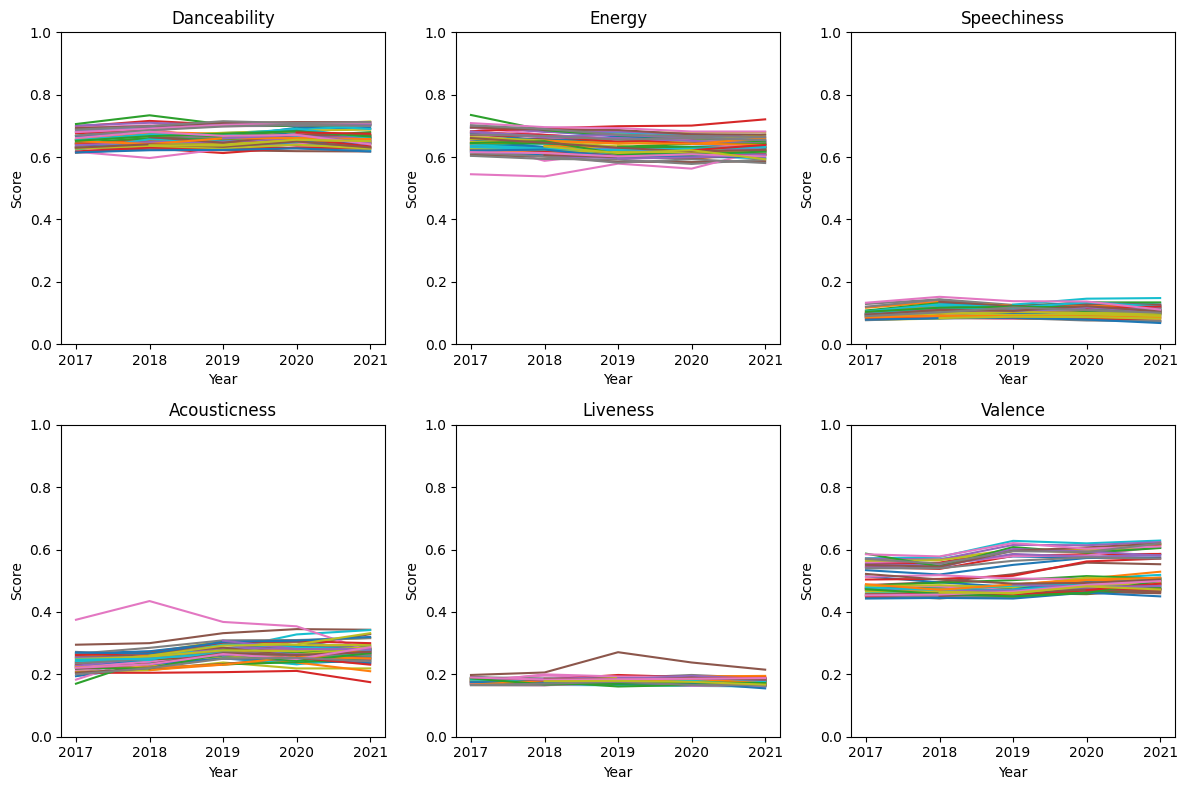

In [274]:
import matplotlib.pyplot as plt

# define the size of each subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# iterate through each feature and plot it in a subplot
for i, feature in enumerate(['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']):
    ax = axes[i//3, i%3]
    for region, group in top200_average_features.groupby('region'):
        group.plot(x='Year', y=feature, ax=ax, label=region)
        ax.set_ylim(0, 1)
        ax.set_title(feature.capitalize())
        ax.set_xlabel('Year')
        ax.set_ylabel('Score')
    ax.legend().remove()

plt.tight_layout()
plt.show()

It looks like Valence and Acousticness are slightly increasing over time, and that Energy is maybe slightly decreasing over time. What do the numbers tell us?